In [4]:
import nltk
nltk.data.path.append('/root/nltk_data')  # Add this if needed
nltk.download('punkt', download_dir='/root/nltk_data')
nltk.download('stopwords', download_dir='/root/nltk_data')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

       textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan        38928346.0         652860.0   
1          noon       21-30      Albania         2877797.0          27400.0   
2         night       31-45      Algeria        43851044.0        2381740.0   
3       morning       46-60      Andorra           77265.0            470.0   
4          noon       60-70       Angola        32866272.0        1246700.0   

   Density (P/Km²)  
0             60.0  
1            1

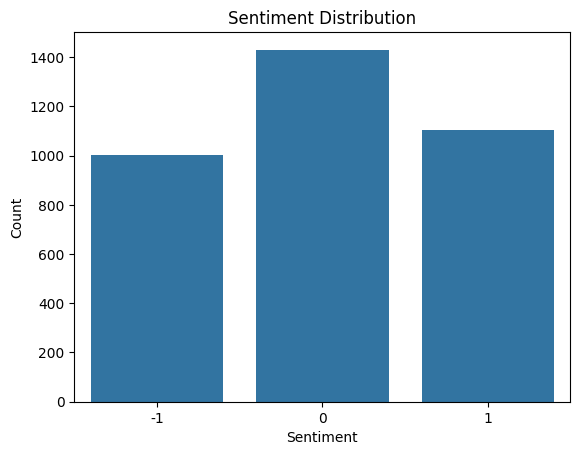

Accuracy: 0.6449787835926449
              precision    recall  f1-score   support

          -1       0.74      0.53      0.62       207
           0       0.57      0.73      0.64       286
           1       0.71      0.64      0.67       214

    accuracy                           0.64       707
   macro avg       0.67      0.63      0.64       707
weighted avg       0.66      0.64      0.64       707



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
path = "/content/test.csv"
df = pd.read_csv(path, encoding='latin1')

# Handle missing values
df.dropna(subset=['text', 'sentiment'], inplace=True)  # Remove rows with missing text/sentiment
df['text'] = df['text'].astype(str)  # Convert text column to string

# Display dataset info
print(df.head())
print(df['sentiment'].value_counts())

# Preprocessing function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    tokens = re.findall(r'\b\w+\b', text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    ps = PorterStemmer()
    tokens = [ps.stem(word) for word in tokens]
    return " ".join(tokens)

df['cleaned_text'] = df['text'].apply(clean_text)

# Convert labels to numeric
df['sentiment'] = df['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# Visualizing Sentiment Distribution
sns.countplot(x=df['sentiment'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['sentiment'], test_size=0.2, random_state=42)

# Vectorizing text
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Model Training
model = LogisticRegression()
model.fit(X_train_vect, y_train)

# Predictions
y_pred = model.predict(X_test_vect)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [6]:
# Function for sentiment prediction
def predict_sentiment(text):
    cleaned_text = clean_text(text)
    vectorized_text = vectorizer.transform([cleaned_text])
    sentiment = model.predict(vectorized_text)[0]
    sentiment_label = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}
    return sentiment_label[sentiment]

# Example Usage
while True:
    user_input = input("Enter a phrase to analyze sentiment (or 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    print("Predicted Sentiment:", predict_sentiment(user_input))

Enter a phrase to analyze sentiment (or 'exit' to quit): good
Predicted Sentiment: Positive
Enter a phrase to analyze sentiment (or 'exit' to quit): bad
Predicted Sentiment: Negative
Enter a phrase to analyze sentiment (or 'exit' to quit): medicore
Predicted Sentiment: Neutral
Enter a phrase to analyze sentiment (or 'exit' to quit): happy
Predicted Sentiment: Positive
Enter a phrase to analyze sentiment (or 'exit' to quit): sad
Predicted Sentiment: Negative
Enter a phrase to analyze sentiment (or 'exit' to quit): ok
Predicted Sentiment: Neutral
Enter a phrase to analyze sentiment (or 'exit' to quit): exit
